In [1]:
# Dependencies
import pandas as pd
from pathlib import Path

# Needed for visualisation
import seaborn as sns 
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## Load the dataset

In [2]:
# Read the dataset file with the Pandas 
dataset_df = pd.read_csv("../Outputs/Employee_attrition.csv")

# Display the dataframe
dataset_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [3]:
# Display all columns in the dataset
dataset_df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [4]:
# Business Travel statistics
dataset_df['BusinessTravel'].value_counts()

BusinessTravel
Travel Rarely        1043
Travel Frequently     277
Non-Travel            150
Name: count, dtype: int64

In [5]:
# Department statistics
dataset_df['Department'].value_counts()


Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64

In [6]:
# EducationField statistics
dataset_df['EducationField'].value_counts()

EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64

In [7]:
# Job Role statistics
dataset_df['JobRole'].value_counts()

JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: count, dtype: int64

In [8]:
# Marial Status statistics
dataset_df['MaritalStatus'].value_counts()

MaritalStatus
Married     673
Single      470
Divorced    327
Name: count, dtype: int64

## Employee Attrition

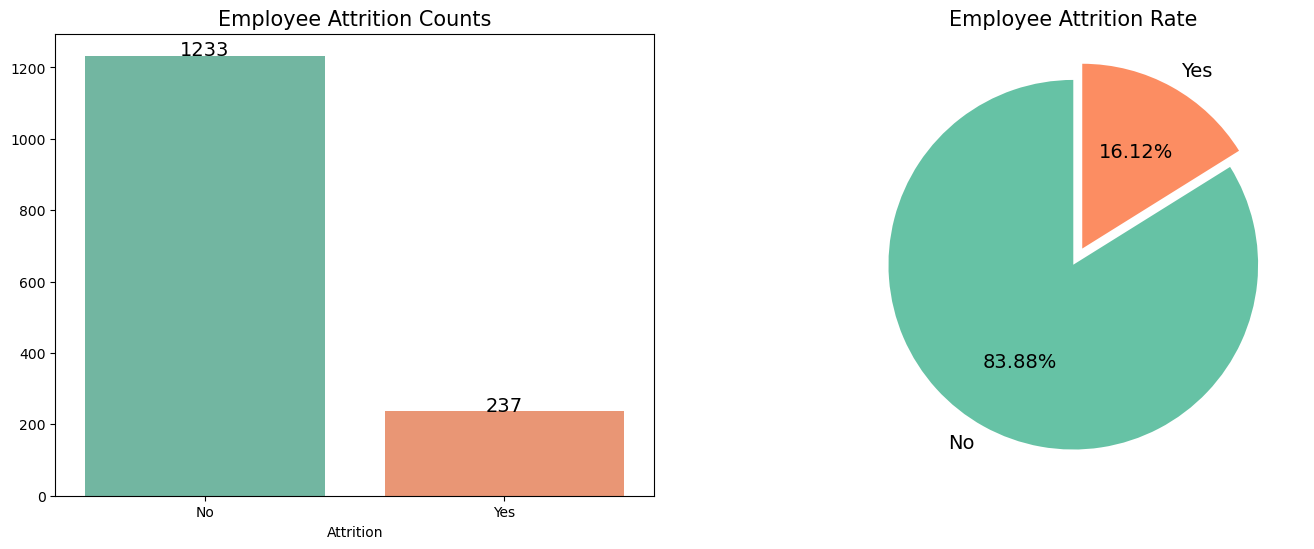

In [9]:
# Employee Attrition in Counts.
plt.figure(figsize=(17,6))
plt.subplot(1,2,1)
attrition_rate = dataset_df["Attrition"].value_counts()
sns.barplot(x=attrition_rate.index,y=attrition_rate.values,palette= 'Set2')
plt.title("Employee Attrition Counts", size=15)
for i, v in enumerate(attrition_rate.values):
    plt.text(i, v, v,ha="center", fontsize=14)

# Employee Attrition in Percentage.
plt.subplot(1,2,2)
colors = sns.color_palette('Set2', len(attrition_rate))
plt.pie(attrition_rate, labels=["No","Yes"], autopct="%.2f%%", textprops={"size":14},
        colors = colors,explode=[0,0.1],startangle=90)
center_circle = plt.Circle((0, 0), 0.3, fc='white')
plt.title("Employee Attrition Rate", size=15)

# Save picture
plt.savefig("../Outputs/employee_attrition.png")

In [10]:
attrition_yes_df = dataset_df[dataset_df['Attrition'] == 'Yes']
attrition_yes_df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
2,37,Yes,Travel Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
14,28,Yes,Travel Rarely,103,Research & Development,24,3,Life Sciences,3,Male,...,3,2,0,6,4,3,4,2,0,3
21,36,Yes,Travel Rarely,1218,Sales,9,4,Life Sciences,3,Male,...,4,2,0,10,4,3,5,3,0,3
24,34,Yes,Travel Rarely,699,Research & Development,6,1,Medical,2,Male,...,3,3,0,8,2,3,4,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1438,23,Yes,Travel Frequently,638,Sales,9,3,Marketing,4,Male,...,3,1,1,1,3,2,1,0,1,0
1442,29,Yes,Travel Rarely,1092,Research & Development,1,4,Medical,1,Male,...,3,2,3,4,3,4,2,2,2,2
1444,56,Yes,Travel Rarely,310,Research & Development,7,2,Technical Degree,4,Male,...,3,4,1,14,4,1,10,9,9,8
1452,50,Yes,Travel Frequently,878,Sales,1,4,Life Sciences,2,Male,...,3,4,2,12,3,3,6,3,0,1


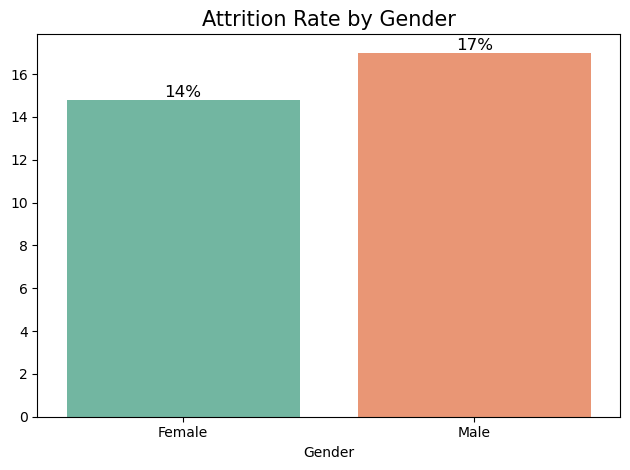

In [11]:
# Attrition rate by Gender
gender_counts = dataset_df['Gender'].value_counts()
gender_yes_counts = attrition_yes_df['Gender'].value_counts()
gender_attrition_rate = ((gender_yes_counts / gender_counts) * 100).sort_values()
sns.barplot(x=gender_attrition_rate.index, y=gender_attrition_rate.values, palette= "Set2")
plt.title("Attrition Rate by Gender", size=15)
for index, value in enumerate(gender_attrition_rate):
    plt.text(index, value, f"{int(gender_attrition_rate[index])}%" , ha="center", va="bottom", size=12)
plt.tight_layout()

plt.savefig("../Outputs/gender_attrition.png")

plt.show()

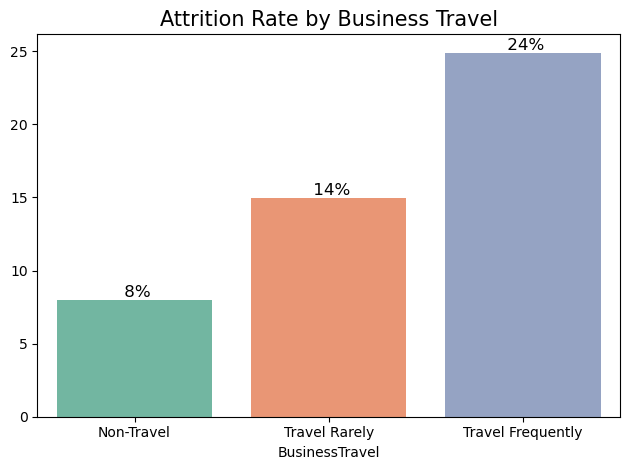

In [12]:
# Attrition rate by Business Travel
business_travel_counts = dataset_df['BusinessTravel'].value_counts()
business_travel_yes_counts = attrition_yes_df['BusinessTravel'].value_counts()
business_travel_attrition_rate = ((business_travel_yes_counts / business_travel_counts) * 100).sort_values()
sns.barplot(x=business_travel_attrition_rate.index, y=business_travel_attrition_rate.values, palette= "Set2")
plt.title("Attrition Rate by Business Travel", size=15)
for index, value in enumerate(business_travel_attrition_rate):
    plt.text(index, value, f" {int(business_travel_attrition_rate[index])}%" , ha="center", va="bottom", size=12)
plt.tight_layout()

plt.savefig("../Outputs/business_travel_attrition.png")

plt.show()

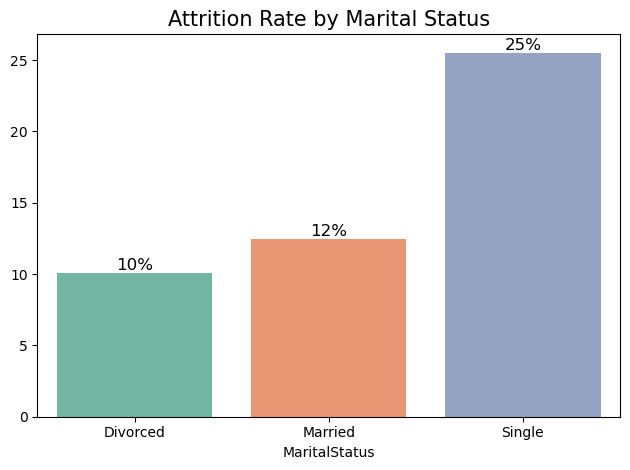

In [13]:
# Attrition rate by Marial Status
marital_status_counts = dataset_df['MaritalStatus'].value_counts()
marital_status_yes_counts = attrition_yes_df['MaritalStatus'].value_counts()
marital_status_attrition_rate = ((marital_status_yes_counts / marital_status_counts) * 100).sort_values()
sns.barplot(x=marital_status_attrition_rate.index, y=marital_status_attrition_rate.values, palette= "Set2")
plt.title("Attrition Rate by Marital Status", size=15)
for index, value in enumerate(marital_status_attrition_rate):
    plt.text(index, value, f"{int(marital_status_attrition_rate[index])}%", ha="center", va="bottom", size=12)
plt.tight_layout()

plt.savefig("../Outputs/marital_status_attrition.png")

plt.show()

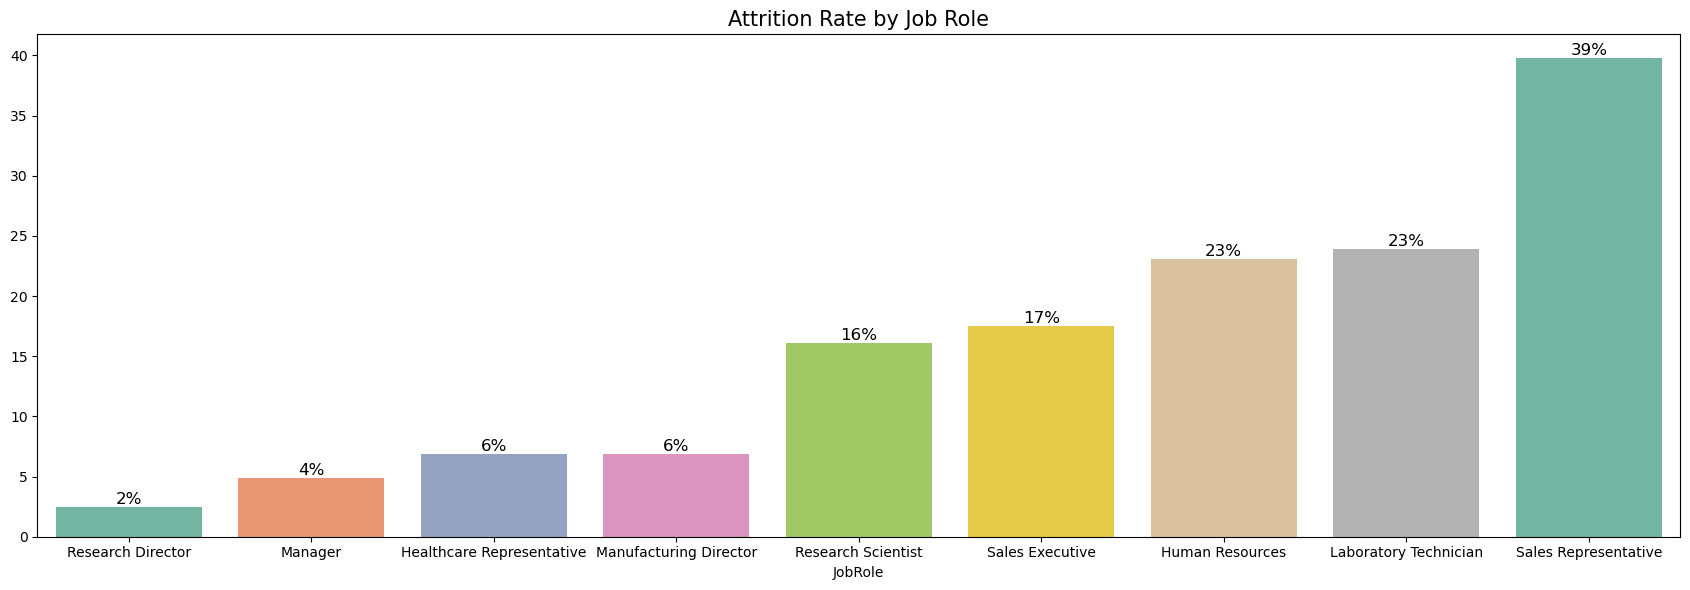

In [14]:
# Attrition rate by Job Role
plt.figure(figsize=(17,6))
job_role_counts = dataset_df['JobRole'].value_counts()
job_role_yes_counts = attrition_yes_df['JobRole'].value_counts()
job_role_attrition_rate = ((job_role_yes_counts / job_role_counts) * 100).sort_values()
sns.barplot(x=job_role_attrition_rate.index, y=job_role_attrition_rate.values, palette= "Set2")
plt.title("Attrition Rate by Job Role", size=15)
for index, value in enumerate(job_role_attrition_rate):
    plt.text(index, value, f"{int(job_role_attrition_rate[index])}%", ha="center", va="bottom", size=12)
plt.tight_layout()

plt.savefig("../Outputs/job_role_attrition.png")

plt.show()

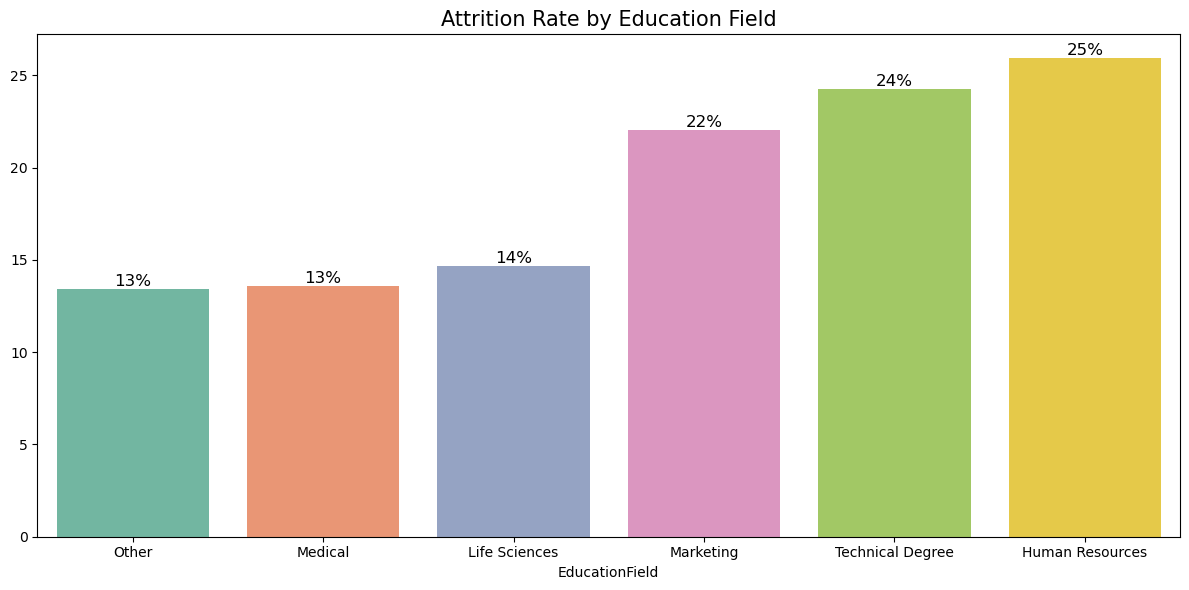

In [15]:
# Attrition rate by Education Field
plt.figure(figsize=(12,6))
educational_field_counts = dataset_df['EducationField'].value_counts()
educational_field_yes_counts = attrition_yes_df['EducationField'].value_counts()
educational_field_attrition_rate = ((educational_field_yes_counts / educational_field_counts) * 100).sort_values()
sns.barplot(x=educational_field_attrition_rate.index, y=educational_field_attrition_rate.values, palette= "Set2")
plt.title("Attrition Rate by Education Field", size=15)
for index, value in enumerate(educational_field_attrition_rate):
    plt.text(index, value, f"{int(educational_field_attrition_rate[index])}%", ha="center", va="bottom", size=12)
plt.tight_layout()

plt.savefig("../Outputs/educational_field_attrition.png")

plt.show()